In [1]:
import CNN_lib
import CNN_utilities
import fig_lib 
import CNN_machine

import numpy as np
import pickle
import json

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# SETTINGS

In [2]:
trains_n=15

data_split='rnd_patients'                                # 'rnd_recs' 'rnd_patients'

checking_on=False
t_btw_frm=0.05
check_record_1= '670615_19'
check_record_2= 'ROT_670615_19'

In [6]:
number_data_ls = [i for i in range(52, 530, 34)]
#number_data_ls = [i for i in range(48, 530, 170)]
models_d = {'model'+'_'+str(n):{'path':None,'name':None,'samples':n} for n in number_data_ls}

epochs = 10

print(len(number_data_ls))
models_d

15


{'model_52': {'path': None, 'name': None, 'samples': 52},
 'model_86': {'path': None, 'name': None, 'samples': 86},
 'model_120': {'path': None, 'name': None, 'samples': 120},
 'model_154': {'path': None, 'name': None, 'samples': 154},
 'model_188': {'path': None, 'name': None, 'samples': 188},
 'model_222': {'path': None, 'name': None, 'samples': 222},
 'model_256': {'path': None, 'name': None, 'samples': 256},
 'model_290': {'path': None, 'name': None, 'samples': 290},
 'model_324': {'path': None, 'name': None, 'samples': 324},
 'model_358': {'path': None, 'name': None, 'samples': 358},
 'model_392': {'path': None, 'name': None, 'samples': 392},
 'model_426': {'path': None, 'name': None, 'samples': 426},
 'model_460': {'path': None, 'name': None, 'samples': 460},
 'model_494': {'path': None, 'name': None, 'samples': 494},
 'model_528': {'path': None, 'name': None, 'samples': 528}}

### DATA SPLIT

In [4]:
if data_split == 'rnd_recs': test_size=0.2           

elif data_split == 'rnd_patients': patiens_split =[12,6]

### DATA AUGMENTATION

In [5]:
n_flip_1,n_flip_0=0.7 , 0.07

n_rot_1,n_rot_0=0.7 , 0.07

n_contr_1,n_contr_0=0.4 , 0.04

n_bright_1,n_bright_0=0.4 , 0.04

aug_params={'f1':n_flip_1,'f0':n_flip_0,'r1':n_rot_1,'r0':n_rot_0,'c1':n_contr_1,'c0':n_contr_0,'b1':n_bright_1,'b0':n_bright_0}

### PATHS

In [6]:
checkpoint_path = "C:/PROJECTS\emboendo\CNN\python-machine-learning\emboendo_ML\embo_CNN_lab\_static/AUC_VS_SAMPLES_CHECKPOINTS/chP"
pkl_train_p='C:\PROJECTS\emboendo\CNN/pikles/processed_train_d.pkl'  

for n in number_data_ls:
    
    models_d['model'+'_'+str(n)]['path']=checkpoint_path+'_'+str(n)
    models_d['model'+'_'+str(n)]['name']='MODEL'+ ' ' + str(n)

check_points_p = [checkpoint_path+'_'+str(n)+'.h5' for n in range(trains_n)]

if data_split == 'rnd_patients': json_fix_sq_p='C:\PROJECTS\emboendo\dicom_viewer\_static\Jsons\points_fix_d.json'

# GENERATE TRAIN DATA

In [7]:
if data_split == 'rnd_patients':

    with open(json_fix_sq_p, 'r') as json_file:
        json_d = json.load(json_file)

    patients_d_df =  CNN_utilities.gen_patients_d_df(json_d)

In [8]:
with open(pkl_train_p, 'rb') as pikle_file:

    save_trains= pickle.load(pikle_file)

x_train,y_train,rcs =  save_trains[0],save_trains[1],save_trains[2]

max_frm_n, HEIGHT, WIDTH=np.shape(x_train)[1],np.shape(x_train)[2],np.shape(x_train)[3]
input_shape=(max_frm_n, HEIGHT, WIDTH, 1)

## MAIN DATA SHUFFLE

In [9]:
X_train,Y_train,recs=CNN_lib.shuffle(x_train,y_train,rcs)

# CNN

In [10]:
models=[CNN_machine.Gen_Model(aug_params,patients_d_df,name=values['name'],path=values['path'],input_shape=input_shape,samples=values['samples']) for values in models_d.values()]

In [11]:
for mdl in models:mdl.train_model(X_train,Y_train,recs, epochs,trains_n,patiens_split)

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


------- MODEL 48: ITERATION 1/3 COMPLETED -------
5/5 [==============================] - 0s 64ms/step


c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


------- MODEL 48: ITERATION 2/3 COMPLETED -------
5/5 [==============================] - 0s 64ms/step


c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


------- MODEL 48: ITERATION 3/3 COMPLETED -------
5/5 [==============================] - 0s 57ms/step


c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


------- MODEL 218: ITERATION 1/3 COMPLETED -------
4/4 [==============================] - 0s 68ms/step


c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


------- MODEL 218: ITERATION 2/3 COMPLETED -------
5/5 [==============================] - 0s 58ms/step


c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


------- MODEL 218: ITERATION 3/3 COMPLETED -------
5/5 [==============================] - 0s 56ms/step


c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


------- MODEL 388: ITERATION 1/3 COMPLETED -------
4/4 [==============================] - 0s 71ms/step


c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


------- MODEL 388: ITERATION 2/3 COMPLETED -------
4/4 [==============================] - 0s 63ms/step


c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


------- MODEL 388: ITERATION 3/3 COMPLETED -------
5/5 [==============================] - 0s 59ms/step


In [12]:
#for mdl in models:CNN_lib.plot_train_eval(mdl.history,epochs)

In [13]:
#for mdl in models: CNN_lib.plot_roc_curve(mdl.fpr_val,mdl.tpr_val,mdl.roc_auc)

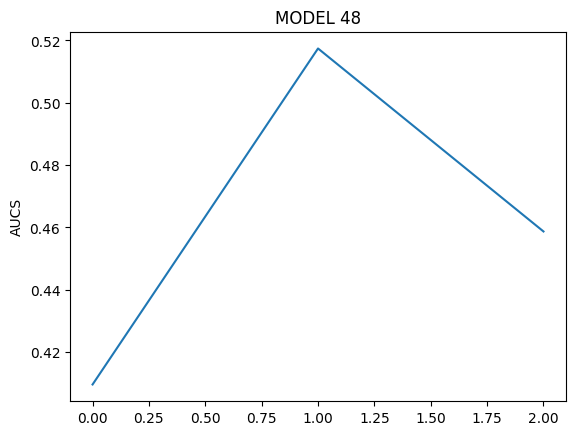

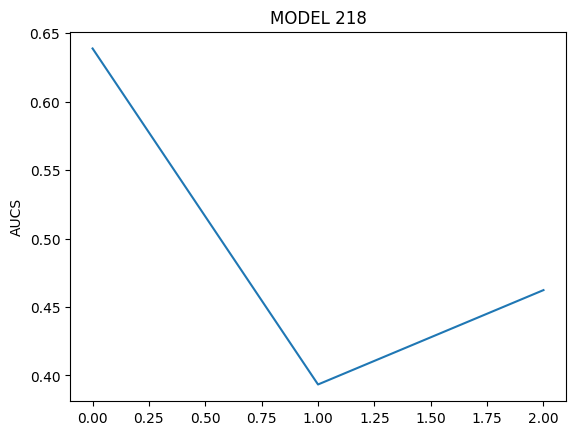

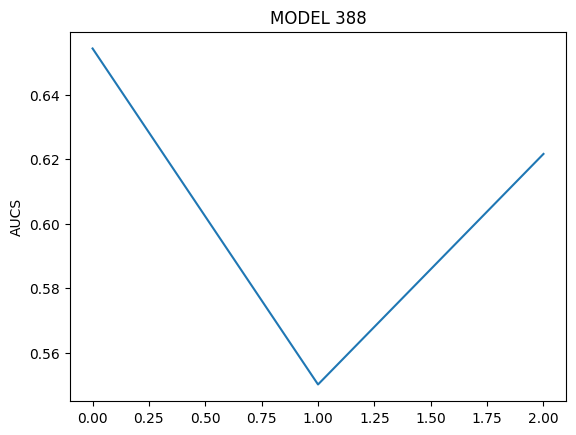

In [14]:
for mdl in models:CNN_lib.list_plot(mdl.roc_aucs,title=mdl.name,ylabel='AUCS')

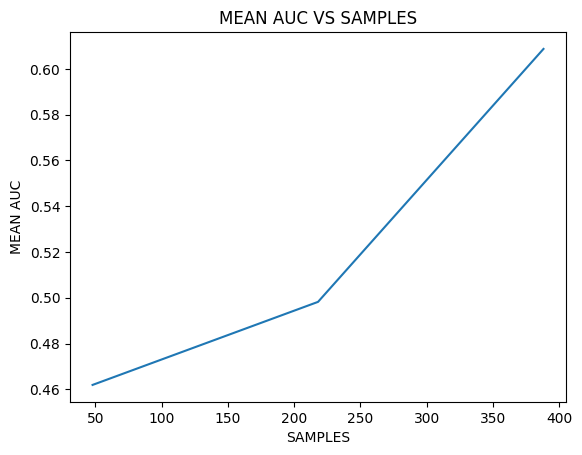

In [15]:
AUC_ls=[np.mean(mdl.roc_aucs) for mdl in models]
number_points=[mdl.samples for mdl in models]

CNN_lib.simple_plot(number_points,AUC_ls,title='MEAN AUC VS SAMPLES',xlabel='SAMPLES',ylabel='MEAN AUC')